Enzo Gevartosky 11912641
Guilherme Costa dos Santos 12552707

In [103]:
using Plots, MAT, FFTW, StatsBase

In [104]:
function flattop(N::Int)
    n = 0:N-1
    L = (N-1)/2
    w = 0.24726 .+ 0.46071cos.(2pi*(n.-L)/(N-1)) .+ 0.25078cos.(4pi*(n.-L)/(N-1)) .+ 0.04125cos.(6pi*(n.-L)/(N-1))
    return w 
end

flattop (generic function with 1 method)

In [105]:
#reading the file
sig_m = matopen("sinal.mat")
sig = get(read(sig_m), "x", [])
Ta = get(read(sig_m), "Ta", 0.0001)
n = collect(range(start=0, length=size(sig)[1], step=1))
t = collect(range(start=0, length=size(sig)[1], step=Ta))
N = 1406

1406

In [106]:
countmap(sig) # Nenhum valor se repete no sinal
N-length(sig)

382

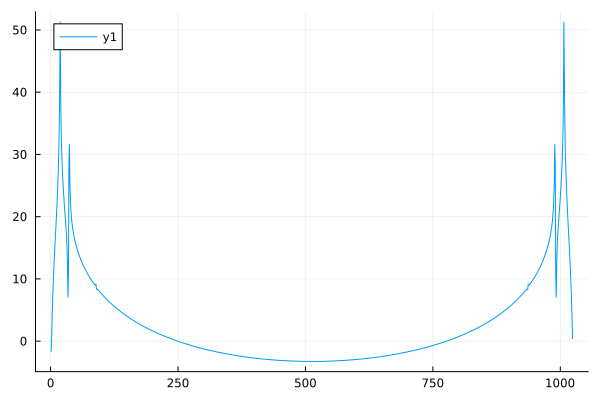

In [107]:
SFTD = fft(sig)
plot(20 .* log10.(abs.(SFTD)))
#plot!(n, angle.(SFTD))

In [116]:
function find_max(vec)
    max_points = []
    for i in range(start=2, length=size(vec)[1]-2, step=1)
        amp = abs(vec[i])
        amp_prev = abs(vec[i-1])
        amp_next = abs(vec[i+1])
        if ((amp > amp_prev) && (amp > amp_next))
            append!(max_points, i)
        end
    end
    return max_points
end

max_points = find_max(SFTD) #Isso mostra os máximos locais da SFTD

8-element Vector{Any}:
   19
   37
   89
   91
  935
  937
  989
 1007

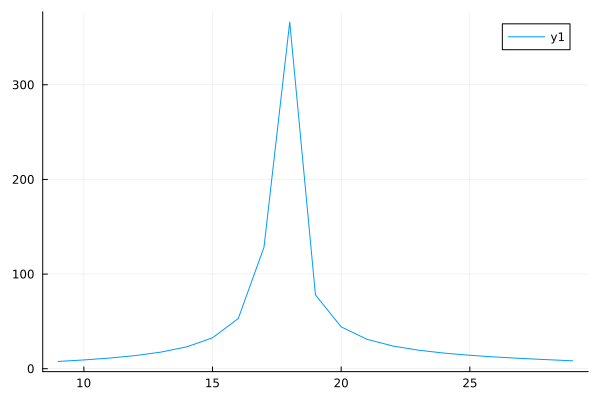

In [109]:
plot(n[10:30], abs.(SFTD[10:30])) #Esse é o maior pico na SFTD, portanto a senoide de maior amplitude

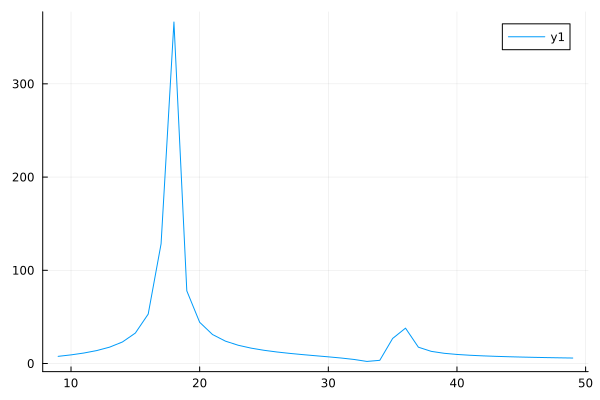

In [110]:
plot(n[10:50], abs.(SFTD[10:50])) #Aqui percebe-se outro pico, menor porém ainda considerável

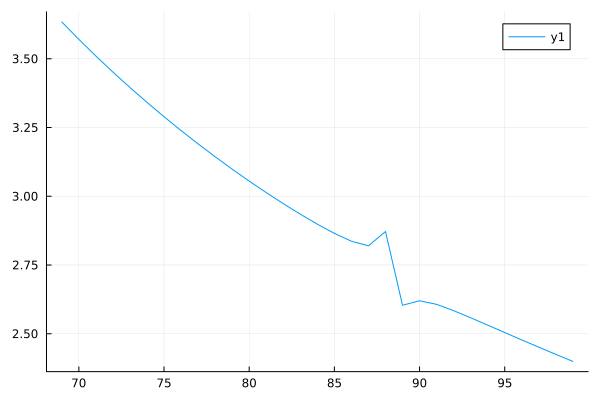

In [111]:
plot(n[70:100], abs.(SFTD[70:100]))
#Aqui percebe-se dois máximos locais, porém a tendência do gráfico ainda é negativa, ou seja eles não são
#senóides que aparecem no sinal real

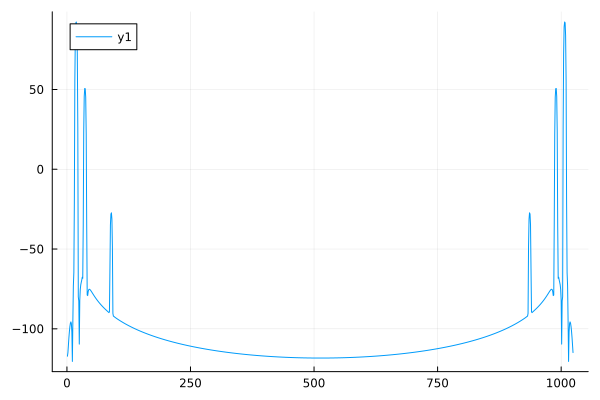

In [112]:
sig_filt = flattop(1024) .* sig
SFTD_filt = fft(sig_filt)
plot(20 .* log.(abs.(SFTD_filt)))

In [115]:
max_points₂ = find_max(SFTD_filt)

12-element Vector{Any}:
    8
   19
   31
   36
   45
   90
  936
  981
  990
  995
 1007
 1018

In [121]:
f₁ = (1/Ta) .* max_points[1]
f₂ = (1/Ta) .* max_points[2]
print("A primeira senoide tem frequência ")
print(f₁/1000)
print("kHz, E a segunda tem frequência ")
print(f₂/1000)
print("kHz")

A primeira senoide tem frequência 190.0kHz, E a segunda tem frequência 370.0kHz